In [6]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

In [7]:
stock=web.DataReader('MRF.BO', 'yahoo', start="01-01-2012", end="31-12-2017")
stock=stock.dropna(how='any')

In [8]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,7045.000000,6876.000000,6964.600098,6950.500000,1689.0,6861.639160
2012-01-03,7135.000000,7000.000000,7000.000000,7067.250000,5153.0,6976.895508
2012-01-04,7092.899902,6990.000000,7071.000000,7010.149902,1344.0,6920.525391
2012-01-05,7078.500000,6471.600098,7015.000000,6820.700195,2481.0,6733.497559
2012-01-06,7000.000000,6900.000000,6900.100098,6946.450195,1469.0,6857.640625


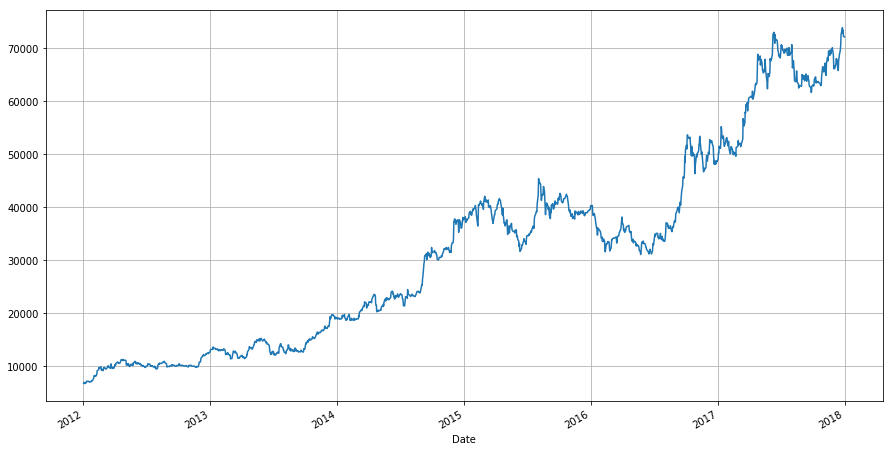

In [11]:
plt.figure(figsize=(15,8))
stock['Adj Close'].plot(grid=True)
plt.show()

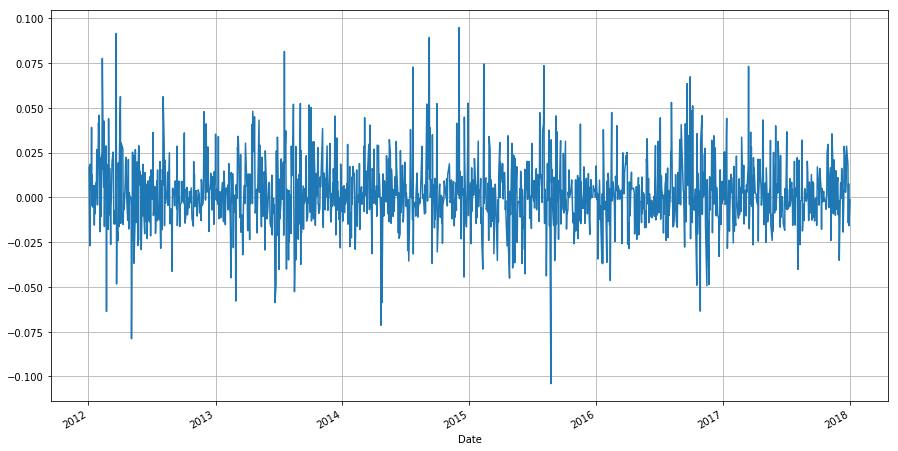

In [14]:
plt.figure(figsize=(15,8))
stock['ret']=stock['Adj Close'].pct_change()
stock['ret'].plot(grid=True)
plt.show()

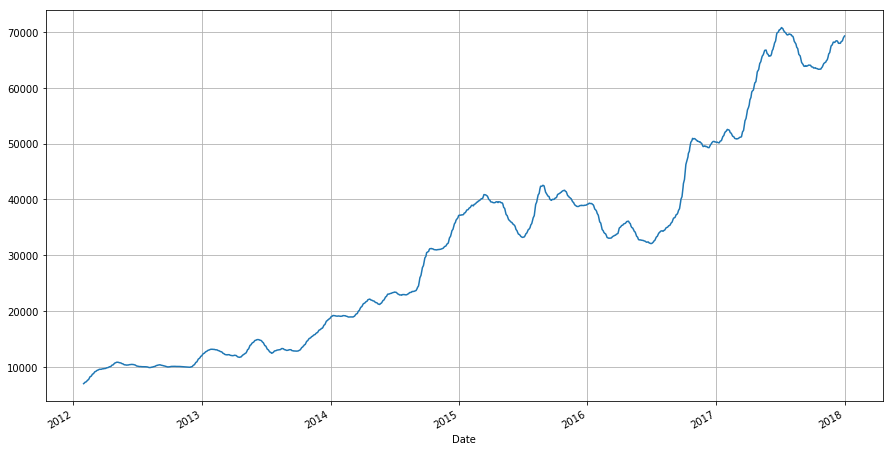

In [16]:
plt.figure(figsize=(15,8))
stock['20d']=stock['Adj Close'].rolling(window=20, center=False).mean()
stock['20d'].plot(grid=True)
plt.show()

In [17]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1478 entries, 2012-01-02 to 2018-01-01
Data columns (total 8 columns):
High         1478 non-null float64
Low          1478 non-null float64
Open         1478 non-null float64
Close        1478 non-null float64
Volume       1478 non-null float64
Adj Close    1478 non-null float64
ret          1477 non-null float64
20d          1459 non-null float64
dtypes: float64(8)
memory usage: 103.9 KB


In [18]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close,ret,20d
Date,,,,,,,,
2012-01-02,7045.000000,6876.000000,6964.600098,6950.500000,1689.0,6861.639160,NaN,NaN
2012-01-03,7135.000000,7000.000000,7000.000000,7067.250000,5153.0,6976.895508,0.016797,NaN
2012-01-04,7092.899902,6990.000000,7071.000000,7010.149902,1344.0,6920.525391,-0.008080,NaN
2012-01-05,7078.500000,6471.600098,7015.000000,6820.700195,2481.0,6733.497559,-0.027025,NaN
2012-01-06,7000.000000,6900.000000,6900.100098,6946.450195,1469.0,6857.640625,0.018437,NaN


In [21]:
stock['t']=range (1, len(stock)+1)
stock['sqt t']= stock['t']**2
stock['tXD']=stock['t']*stock['Adj Close']
n=len(stock)

slope=(n*stock['tXD'].sum() - stock['t'].sum()*stock['Adj Close'].sum())/(n*stock['sqt t'].sum()-(stock['t'].sum())**2)

intercept = (stock['Adj Close'].sum()*stock['sqt t'].sum() - stock['t'].sum()*stock['tXD'].sum())/(n*stock['sqt t'].sum() - (stock['t'].sum())**2)
print ('The slope of the linear trend (b) is: ', slope)
print ('The intercept (a) is: ', intercept)

The slope of the linear trend (b) is:  41.25114127965924
The intercept (a) is:  1257.4033916644426


In [22]:
stock['forcast']=intercept+ slope*stock['t']

stock['error']=stock['Adj Close']-stock['forcast']

mean_error=stock['error'].mean()

print('The mean error is :', mean_error)

The mean error is : 4.563472739071743e-12
